In [2]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')


In [3]:
df = pd.read_csv('drug.csv')
print('Shape of dataset: ',df.shape)

Shape of dataset:  (161297, 7)


In [4]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print('Number of unique drugs present in dataset: ',df['drugName'].nunique())
print('Number of unique medical conditions present in dataset: ',df['condition'].nunique())
print('\nTime period of collection data')
print('Starting date: ',df['date'].min())
print('Ending date: ',df['date'].max())

Number of unique drugs present in dataset:  3436
Number of unique medical conditions present in dataset:  884

Time period of collection data
Starting date:  1-Apr-08
Ending date:  9-Sep-17


In [6]:
df[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [7]:
print('Analysis on useless drugs')
print('-----------------------------')
print('Number of drugs with no useful count: ',df[df['usefulCount']==0].count()[0])

print('Number of good drugs with lesser useful count: ',df[(df['usefulCount']==0)& df['rating']>=8].count()[0])
print('Average rating of drugs with no useful count: {0:.2f}'.format(df[df['usefulCount']==0]['rating'].mean()))

print('\nAnalysis on useful drugs')
print('-----------------------------')
print('Number of drugs with greater than 1000 useful counts: ',df[df['usefulCount']>1000].count()[0])
print('Average rating of drugs with 1000+ useful counts: ',df[df['usefulCount']>1000]['rating'].mean())
print('\nName and condition of these drugs: \n\n',
     df[df['usefulCount']>1000][['drugName','condition']].reset_index(drop=True))


Analysis on useless drugs
-----------------------------
Number of drugs with no useful count:  6318
Number of good drugs with lesser useful count:  0
Average rating of drugs with no useful count: 5.80

Analysis on useful drugs
-----------------------------
Number of drugs with greater than 1000 useful counts:  4
Average rating of drugs with 1000+ useful counts:  10.0

Name and condition of these drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [8]:
df[['drugName','condition','review']].describe(include='object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [9]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum().sum()

0

# Hidden patterns of data

C:\Users\dell\AppData\Local\Temp\ipykernel_18532\3079685675.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])
C:\Users\dell\AppData\Local\Temp\ipykernel_18532\3079685675.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['usefulCount'])


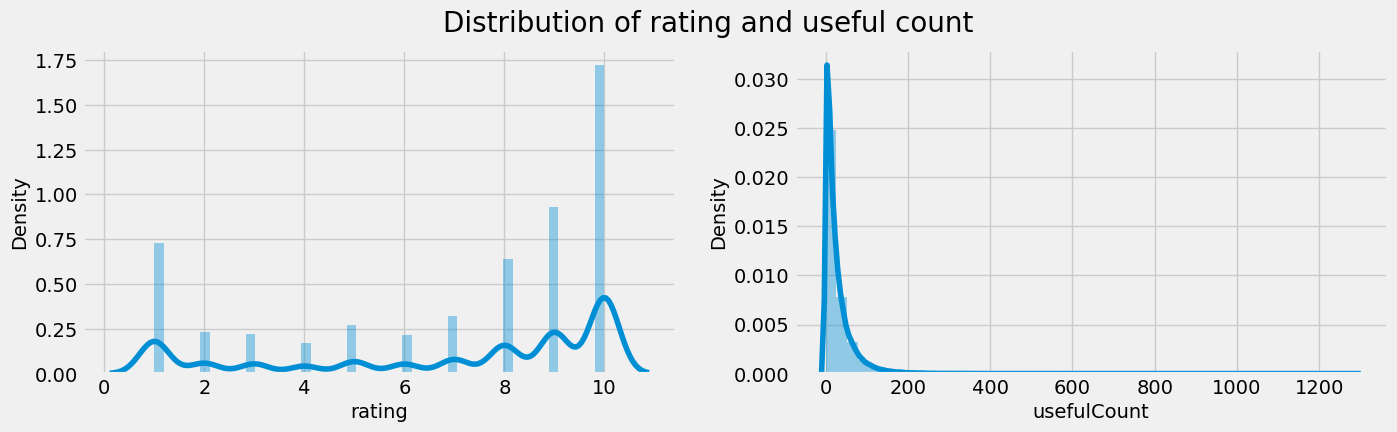

In [11]:
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.distplot(df['rating'])

plt.subplot(1,2,2)
sns.distplot(df['usefulCount'])

plt.suptitle('Distribution of rating and useful count \n', fontsize=20)
plt.show()

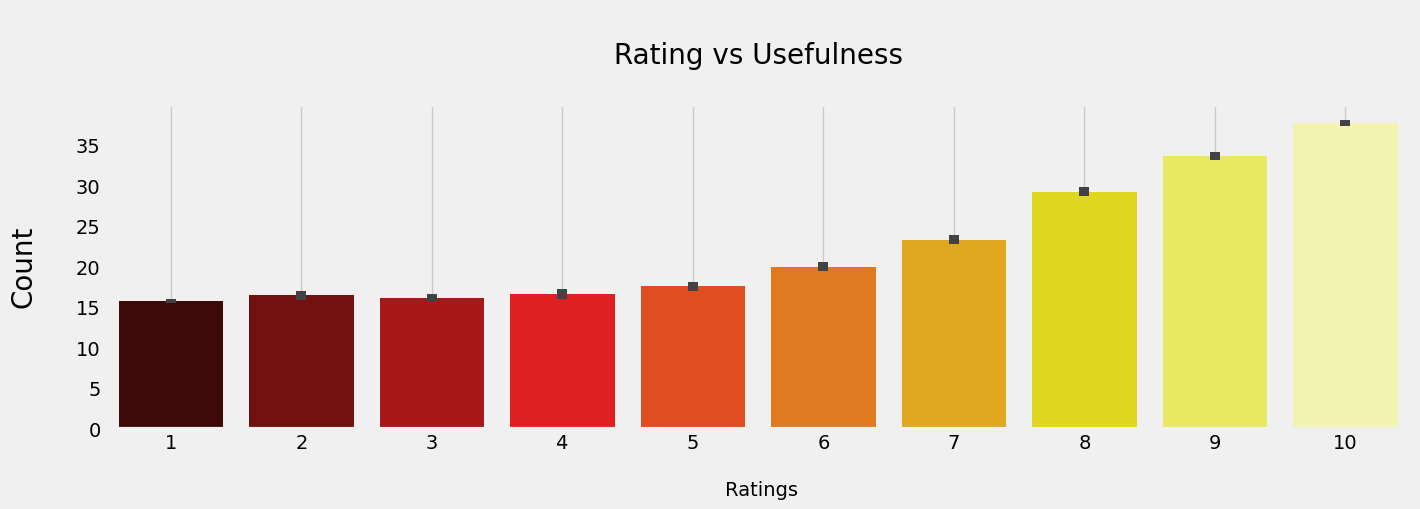

In [12]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(x=df['rating'], y=df['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [13]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
df['len'] = df['review'].apply(len)

In [14]:
df[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [15]:
print('Length of longest review', df['len'].max())
df['review'][df['len']==df['len'].max()].iloc[0]

Length of longest review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

## cleaning reviews

In [16]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str
df['review'] = df['review'].apply(punctuation_removal)

In [ ]:
# let's remove stopwords 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")
stop_words = []

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)
    
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str
           if word.lower() not in stop_words]

df['review'] = df['review'].apply(stopwords_removal)

In [ ]:
# remove numbers
import re
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ' '.join(list_text_new)
df['review'] = df['review'].apply(drop_numbers)
        

# calculating sentiment from reviews

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in df['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
train_sentiments = np.asarray(train_sentiments)
df['sentiment'] = pd.Series(df=train_sentiments)

In [ ]:
df[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

In [ ]:
df = df.drop(['date','uniqueID','sentiment','review','len'], axis=1)


In [ ]:
df.columns

## effectiveness and usefulness of drugs


In [ ]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating)==0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
df['eff_score'] = df['rating'].apply(scale_rating)

In [ ]:
# lets also calculate Usefulness Score

df['usefulness'] = df['rating']*df['usefulCount']*df['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
df[['drugName','condition','usefulness']][df['usefulness'] > 
                            df['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

# analyzing medical condition

In [ ]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition

@interact
def check(condition = list(df['condition'].value_counts().index)):
    return df[df['condition'] == condition]['eff_score'].value_counts()

In [ ]:
# lets check this in Graph, 

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = df.loc[df['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = df['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [ ]:
print("Number of Unique Conditions :", df['condition'].nunique())
df['condition'].value_counts().head(10)

In [ ]:
# lets check Drugs, which were useful to Highest Number of Poeple
df[['drugName','usefulCount']][df['usefulCount'] >
                    df['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

# most useful and useless drugs for each condition

In [ ]:
df = df.drop_duplicates()

In [ ]:
# lets find the Highest and Lowest Rated Drugs for each Condition

@interact
def high_low_rate(condition = list(df['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(df[df['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(df[df['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))